In [1]:
import pandas as pd 

In [4]:
file_path = r'C:\Users\agyei\Downloads\archive\Spotify Most Streamed Songs.csv'
data = pd.read_csv(file_path)

In [5]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [6]:
# Checking  for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Dropping column(s) with too many missing values or irrelevant information:
data_cleaned = data.drop(columns=['cover_url'])  


track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
cover_url                0
dtype: int64


In [11]:
# Checking  if the 'streams' column has non-string values, convert them all to string format first
data_cleaned['streams'] = data_cleaned['streams'].apply(lambda x: str(x) if not isinstance(x, str) else x)

# Now I  can clean the 'streams' column by removing commas and converting to integers
data_cleaned['streams'] = data_cleaned['streams'].str.replace(',', '').astype(int)

# Displaying the first few rows to verify
data_cleaned.head()


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [12]:
# Checking  for duplicates
duplicate_rows = data_cleaned.duplicated()
print(f"Duplicate rows: {duplicate_rows.sum()}")

# Removing  duplicates if needed
data_cleaned = data_cleaned.drop_duplicates()


Duplicate rows: 0


In [15]:
# Checking  for missing or unusual values in the date columns
print(data_cleaned[['released_year', 'released_month', 'released_day']].describe(include='all'))

# Checking  for any rows with missing values in the date columns
missing_dates = data_cleaned[data_cleaned[['released_year', 'released_month', 'released_day']].isnull().any(axis=1)]
print(missing_dates)


       released_year  released_month  released_day
count     952.000000      952.000000    952.000000
mean     2018.288866        6.038866     13.944328
std        11.011397        3.564571      9.197223
min      1930.000000        1.000000      1.000000
25%      2020.000000        3.000000      6.000000
50%      2022.000000        6.000000     13.000000
75%      2022.000000        9.000000     22.000000
max      2023.000000       12.000000     31.000000
Empty DataFrame
Columns: [track_name, artist(s)_name, artist_count, released_year, released_month, released_day, in_spotify_playlists, in_spotify_charts, streams, in_apple_playlists, in_apple_charts, in_deezer_playlists, in_deezer_charts, in_shazam_charts, bpm, key, mode, danceability_%, valence_%, energy_%, acousticness_%, instrumentalness_%, liveness_%, speechiness_%]
Index: []

[0 rows x 24 columns]


In [18]:
# Converting  the date columns to numeric, forcing errors to NaN (to identify problematic rows)
data_cleaned['released_year'] = pd.to_numeric(data_cleaned['released_year'], errors='coerce')
data_cleaned['released_month'] = pd.to_numeric(data_cleaned['released_month'], errors='coerce')
data_cleaned['released_day'] = pd.to_numeric(data_cleaned['released_day'], errors='coerce')

# Checking  if there are any invalid or missing values again
print(data_cleaned[['released_year', 'released_month', 'released_day']].isnull().sum())

# Option 1: Drop rows with missing date values after coercing errors
data_cleaned = data_cleaned.dropna(subset=['released_year', 'released_month', 'released_day'])


# Ensuring the columns are integer type
data_cleaned['released_year'] = data_cleaned['released_year'].astype(int)
data_cleaned['released_month'] = data_cleaned['released_month'].astype(int)
data_cleaned['released_day'] = data_cleaned['released_day'].astype(int)

data_cleaned.head()


released_year     0
released_month    0
released_day      0
dtype: int64


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [19]:
# Converting  categorical columns (if needed)
data_cleaned['mode'] = data_cleaned['mode'].astype('category')


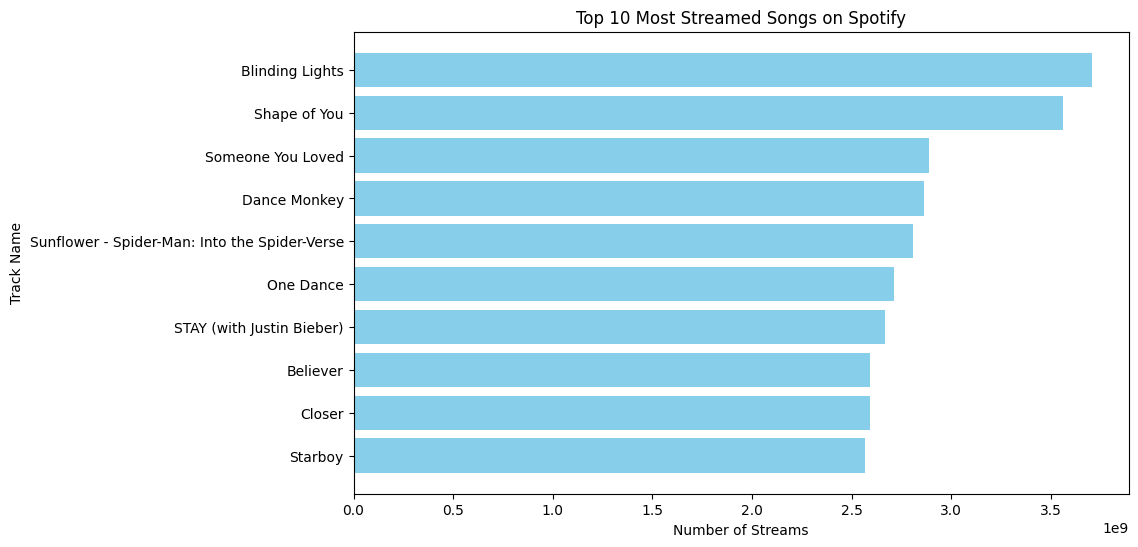

In [20]:
import matplotlib.pyplot as plt

# Top 10 most streamed songs
top_10_songs = data_cleaned.nlargest(10, 'streams')

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_songs['track_name'], top_10_songs['streams'], color='skyblue')
plt.xlabel('Number of Streams')
plt.ylabel('Track Name')
plt.title('Top 10 Most Streamed Songs on Spotify')
plt.gca().invert_yaxis()
plt.show()


In [23]:
# Checking  the columns in the DataFrame
print(data_cleaned.columns)

# Displaying  the first few rows of the DataFrame to inspect the columns
print(data_cleaned.head())


Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')
                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023       

In [25]:
# Saving  the cleaned dataset to a new CSV file
data_cleaned.to_csv('Spotify_Most_Streamed_Songs_Cleaned.csv', index=False)
